**ARIMA MODEL**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Example: Monthly sales data
data = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119,
        104, 118, 115, 126, 141, 135, 125, 149, 170, 170,
        158, 133, 114, 140]

# Convert to pandas Series with index
ts = pd.Series(data, index=pd.date_range(start='2020-01', periods=len(data), freq='M'))

ts

/tmp/ipython-input-3705488586.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = pd.Series(data, index=pd.date_range(start='2020-01', periods=len(data), freq='M'))


,0
2020-01-31,112
2020-02-29,118
2020-03-31,132
2020-04-30,129
2020-05-31,121
2020-06-30,135
2020-07-31,148
2020-08-31,148
2020-09-30,136
2020-10-31,119


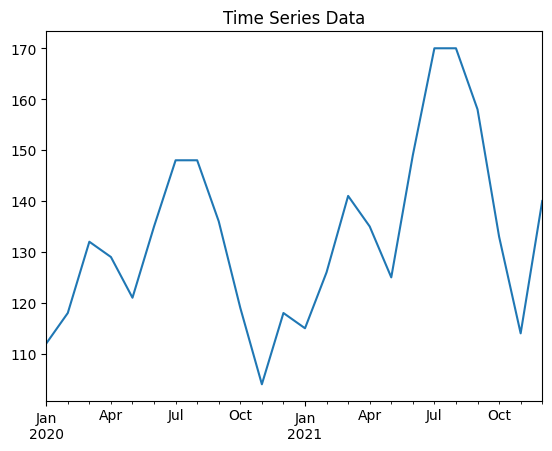

In [ ]:
# Visualize the data
ts.plot(title='Time Series Data')
plt.show()

# ARIMA(1,1,1) --> p=1, d=1, q=1
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
# Forecast future values
forecast_steps = 6  # forecast next 6 months
forecast = model_fit.forecast(steps=forecast_steps)

forecast

,predicted_mean
2022-01-31,154.395610
2022-02-28,152.338815
2022-03-31,152.632683
2022-04-30,152.590696
2022-05-31,152.596695
2022-06-30,152.595838


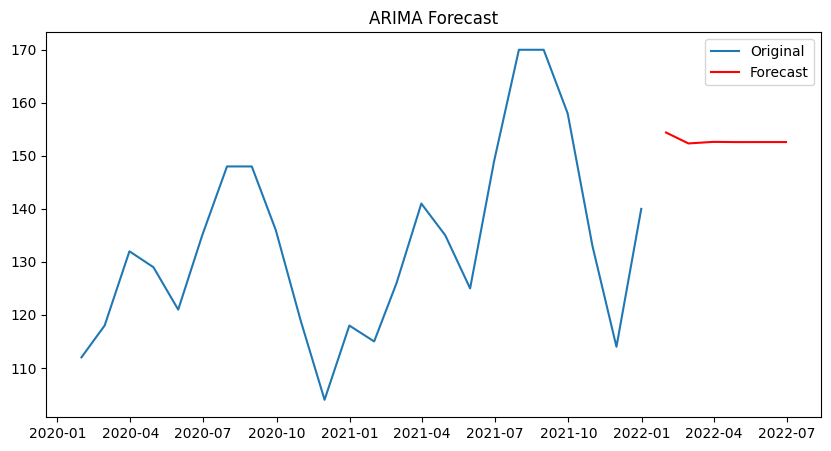

In [ ]:
# Plot actual + forecast
plt.figure(figsize=(10,5))
plt.plot(ts,label='Original')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

**SARIMA MODEL**

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = [100,120,140,160,
        105,125,145,165,
        110,130,150,170,
        115,135,155,175]

# Monthly time index
dates = pd.date_range(start="2022-01", periods=len(data), freq="ME")
ts = pd.Series(data, index=dates)
ts

,0
2022-01-31,100
2022-02-28,120
2022-03-31,140
2022-04-30,160
2022-05-31,105
2022-06-30,125
2022-07-31,145
2022-08-31,165
2022-09-30,110
2022-10-31,130


In [ ]:
# SARIMA model: (p,d,q)(P,D,Q,s)
model = SARIMAX(
    ts,
    order=(1,0,0),
    seasonal_order=(1,1,0,4),
    enforce_stationarity=False,
)

# Fit model
results = model.fit()

# Forecast next 4 time steps
forecast = results.forecast(steps=4)

forecast

,predicted_mean
2023-05-31,120.0
2023-06-30,140.0
2023-07-31,160.0
2023-08-31,180.0
